In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px

In [3]:
hotels = pd.read_csv('data/hotels_train.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [4]:
#удалим столбцы с координатами
hotels = hotels.drop(['lat', 'lng'], axis=1)

In [5]:
#выбираем страну из адреса отеля
hotels['hotel_country'] = hotels['hotel_address'].apply(
    lambda x: 'United Kingdom' if x.split()[-1] == 'Kingdom' else x.split()[-1])

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
ax = sns.histplot(data = hotels, y='hotel_country', color='orange')
ax.set_xlabel('count hotels')
ax.set_ylabel('hotel country')
plt.show()

In [364]:
#создадим колонку с количеством тегов
def word_count(string):

    return(len(string.strip().split(" ")))

hotels['tags_c'] = hotels['tags'].apply(word_count)

In [365]:
hotels['tags_c'].describe()

count    386803.000000
mean         22.252118
std           3.987818
min           3.000000
25%          18.000000
50%          24.000000
75%          25.000000
max          44.000000
Name: tags_c, dtype: float64

In [366]:
#заменяем значения - вылеты на среднее
hotels.loc[(hotels['tags_c'] <= 18), 'tags_c'] = hotels['tags_c'].mean()
hotels['tags_c'].describe()


count    386803.000000
mean         23.649114
std           2.505742
min          19.000000
25%          22.252118
50%          24.000000
75%          25.000000
max          44.000000
Name: tags_c, dtype: float64

In [367]:
#изменим формат даты, оставим месяц опубликования
hotels['month'] = pd.to_datetime(hotels['review_date']).dt.month

In [368]:
#выбираем страну из адреса отеля
hotels['hotel_country'] = hotels['hotel_address'].apply(
    lambda x: 'United Kingdom' if x.split()[-1] == 'Kingdom' else x.split()[-1])

In [369]:
hotels['hotel_country'].value_counts()

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: hotel_country, dtype: int64

In [318]:
import category_encoders as ce

In [348]:
#закодируем название стран

ord_encoder = ce.OrdinalEncoder()
hotels['make'] = hotels['hotel_country'].astype('category')
data_bin = ord_encoder.fit_transform(hotels['hotel_country'])
data_bin.rename(columns={'hotel_country' : 'hotel_country_c'}, inplace=True)


In [349]:
hotels = pd.concat([hotels, data_bin], axis=1)

In [350]:

hotels.info()
hotels_2 = hotels.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               386803 non-null  object  
 1   additional_number_of_scoring                386803 non-null  int64   
 2   review_date                                 386803 non-null  object  
 3   average_score                               386803 non-null  float64 
 4   hotel_name                                  386803 non-null  object  
 5   reviewer_nationality                        386803 non-null  object  
 6   negative_review                             386803 non-null  object  
 7   review_total_negative_word_counts           386803 non-null  int64   
 8   total_number_of_reviews                     386803 non-null  int64   
 9   positive_review                             386803 non-null

In [370]:
# удаление столбцов со строковыми данными

hotels = hotels.drop(columns=[
    'hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 
    'negative_review', 'positive_review', 'tags', 'days_since_review', 'additional_number_of_scoring', 'hotel_country'], axis=1)

In [371]:
hotels.head(3)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags_c,month
0,8.4,3,1994,4,7,10.0,23.000000,2
1,8.3,3,1361,2,14,6.3,22.252118,1
2,8.9,6,406,0,14,7.5,26.000000,10


array([[<AxesSubplot:title={'center':'average_score'}>,
        <AxesSubplot:title={'center':'review_total_negative_word_counts'}>,
        <AxesSubplot:title={'center':'total_number_of_reviews'}>],
       [<AxesSubplot:title={'center':'review_total_positive_word_counts'}>,
        <AxesSubplot:title={'center':'total_number_of_reviews_reviewer_has_given'}>,
        <AxesSubplot:title={'center':'reviewer_score'}>],
       [<AxesSubplot:title={'center':'tags_c'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

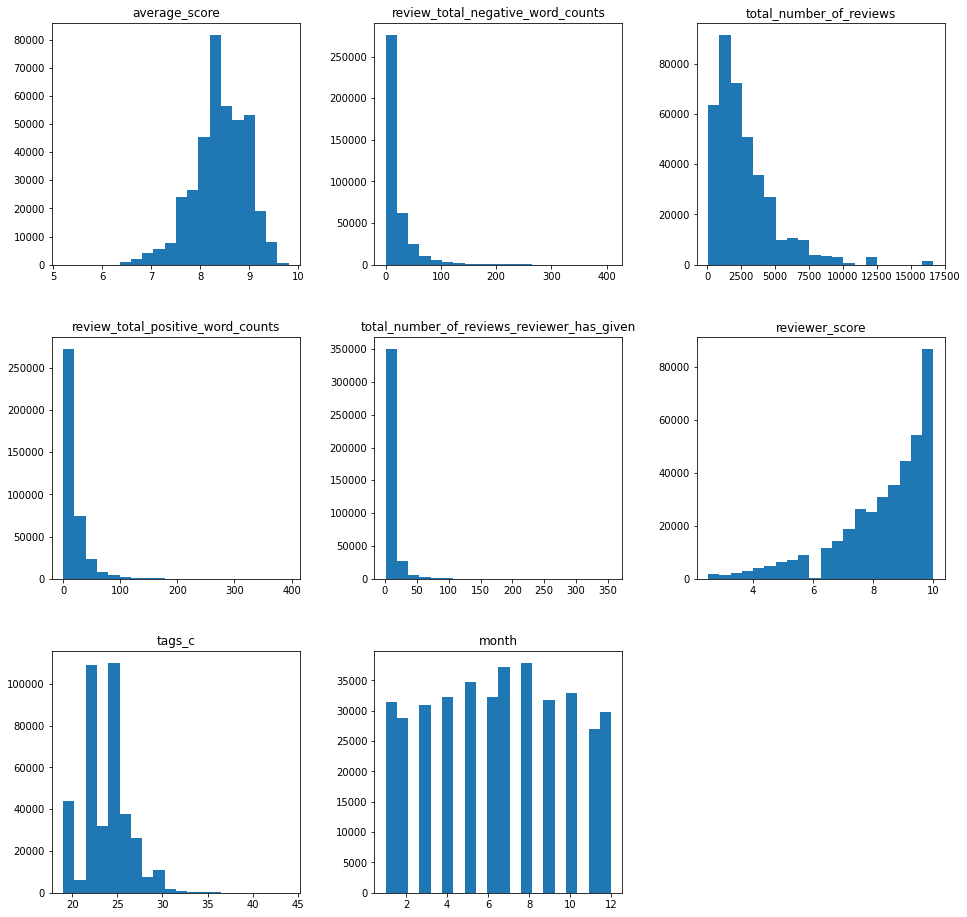

In [372]:
hotels.hist(figsize=(16, 16), bins=20, grid=False)

In [352]:
hotels = hotels.drop(columns=['hotel_country_c'], axis=1)

In [353]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [354]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

hotels['review_total_positive_word_counts'] = pd.DataFrame(
    r_scaler.fit_transform(pd.DataFrame(hotels['review_total_positive_word_counts'])),
    columns=['review_total_positive_word_counts'])



In [355]:
hotels['review_total_negative_word_counts'] = pd.DataFrame(
    r_scaler.fit_transform(pd.DataFrame(hotels['review_total_negative_word_counts'])),
    columns=['review_total_negative_word_counts'])

hotels['total_number_of_reviews_reviewer_has_given'] = pd.DataFrame(
    r_scaler.fit_transform(pd.DataFrame(hotels['total_number_of_reviews_reviewer_has_given'])),
    columns=['total_number_of_reviews_reviewer_has_given'])


In [356]:
hotels['total_number_of_reviews'] = pd.DataFrame(
    r_scaler.fit_transform(pd.DataFrame(hotels['total_number_of_reviews'])),
    columns=['total_number_of_reviews'])

In [357]:
hotels.head(3)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags_c,month
0,8.4,-0.285714,-0.057096,-0.411765,0.571429,10.0,23.000000,2
1,8.3,-0.285714,-0.315253,-0.529412,1.571429,6.3,22.252118,1
2,8.9,-0.142857,-0.704731,-0.647059,1.571429,7.5,26.000000,10


In [373]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [359]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [374]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [375]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


KeyboardInterrupt: 

In [74]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13795409139699968


# Повышение MAPE

Для начала разделим признаки по типу, перечислим их:

In [44]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring']

# категориальные признаки
cat_cols = ['average_score', 'tags_c', 'month']

<AxesSubplot:>

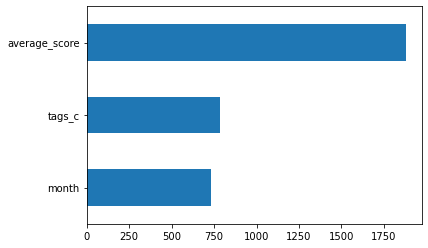

In [42]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

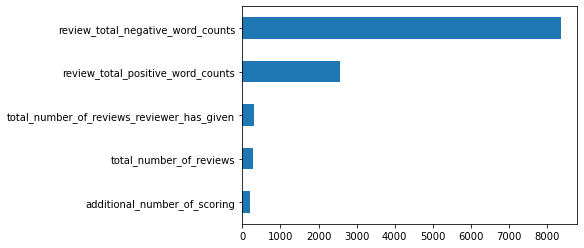

In [45]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

#### Количество отелей в наборе данных

In [16]:
hotels['hotel_name'].describe()

count                                         386803
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

#### Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

In [17]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

#### Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [18]:
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

#### Сколько уникальных тегов представлено в наборе данных

In [19]:
# поиск регулярных выражений

import re

def re_func(num_tags):
    found = re.findall("'[^\'](.+?)[^\']'", num_tags)
    return found


hotels['tags_n'] = hotels['tags'].apply(re_func)
hotels = hotels.explode('tags_n')

hotels['tags_n'].unique()
hotels['tags_n'].value_counts()

Leisure trip                         313593
Submitted from a mobile device       230778
Couple                               189212
Stayed 1 night                       145373
Stayed 2 nights                      100263
                                      ...  
Studio with Spa Access                    1
Comfort Family Room                       1
Junior Suite Free Wifi                    1
Design Suite                              1
Executive Double Room Non Smoking         1
Name: tags_n, Length: 2368, dtype: int64

In [20]:
#подсчет через цикл

tags = list() # множество тегов
for i, row in hotels['tags'].items():
    tmp = row.replace("[' ", "")
    tmp = tmp.replace(" ']", '')
    tmp = tmp.split(" ', ' ")
    for el in tmp:
        if el not in tags:
            tags.append(el)
print(f'Уникальных тегов = {len(tags)}')

Уникальных тегов = 2368


In [ ]:
#подсчет через цикл

tags = list() # множество тегов
for i, row in hotels['hotel_name'].items():
    tmp = row.replace("[' ", "")
    tmp = tmp.replace(" ']", '')
    tmp = tmp.split(" ', ' ")
    for el in tmp:
        if el not in tags:
            tags.append(el)
print(f'Уникальных отелей = {len(tags)}')

Поиск уникальных тегов через цикл в 2 раза дольше.

In [21]:
# удаление столбцов с минимальным влиянием

hotels_drop_2 = hotels_drop.drop(columns=['lat', 'total_number_of_reviews', 'lng', 
'total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring'
], axis=1)

In [22]:
hotels_drop_2.head()

,average_score,review_total_negative_word_counts,review_total_positive_word_counts,reviewer_score
0,8.4,3,4,10.0
1,8.3,3,2,6.3
2,8.9,6,0,7.5
3,7.5,0,11,10.0
4,8.5,4,20,9.6


In [23]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels_drop_2.drop(['reviewer_score'], axis = 1)  
y = hotels_drop_2['reviewer_score'] 

In [24]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [26]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14231674881353115
